### Generate Volume Features from Paper

Potential Avenues for Exploration
- Empirical Distribution (Done)
- Serial Correlation

In [102]:
import sys
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
path='/home/jbohn/jupyter/personal/sbu/Kernel_Learning'

sys.path.append(path)

In [223]:
quotes=pd.read_csv(f"{path}/data/cleaned_quotes.csv",nrows=1000000,index_col=0).sort_index()

quotes

,SIP_Timestamp,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,Source_Of_Quote,Best_Bid_Exchange,Best_Bid_Price,Best_Bid_Size,Best_Offer_Exchange,Best_Offer_Price,Best_Offer_Size,LULD_NBBO_Indicator,Security_Status_Indicator,date
2020-01-15 09:30:00.953633,2020-01-15 09:30:00.954013,N,AAPL,311.94,1.0,326.18,1.0,R,356546,N,N,311.94,1.0,V,311.96,1.0,A,,2020-01-15
2020-01-15 09:30:01.004096,2020-01-15 09:30:01.004476,N,AAPL,310.85,1.0,326.18,1.0,R,357650,N,Q,311.92,2.0,Q,311.99,1.0,A,,2020-01-15
2020-01-15 09:30:01.076382,2020-01-15 09:30:01.076759,N,AAPL,310.85,1.0,311.96,1.0,R,358817,N,Q,311.89,3.0,N,311.96,1.0,A,,2020-01-15
2020-01-15 09:30:01.645062,2020-01-15 09:30:01.645440,N,AAPL,310.85,1.0,311.95,4.0,R,363970,N,Q,311.90,1.0,N,311.95,4.0,A,,2020-01-15
2020-01-15 09:30:01.677976,2020-01-15 09:30:01.678357,N,AAPL,310.85,1.0,311.95,3.0,R,364328,N,P,311.86,2.0,N,311.95,3.0,A,,2020-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-29 15:59:37.990504,2020-01-29 15:59:37.990881,N,AAPL,324.10,1.0,324.60,1.0,R,31890276,N,Q,324.34,1.0,Q,324.39,1.0,A,,2020-01-29
2020-01-29 15:59:42.591204,2020-01-29 15:59:42.591582,N,AAPL,324.05,3.0,324.28,1.0,R,31920111,N,Q,324.23,1.0,Q,324.28,1.0,A,,2020-01-29
2020-01-29 15:59:51.441479,2020-01-29 15:59:51.441858,N,AAPL,323.97,1.0,324.27,1.0,R,31971787,N,Q,324.20,1.0,Q,324.27,2.0,A,,2020-01-29
2020-01-29 15:59:52.555595,2020-01-29 15:59:52.555972,N,AAPL,323.97,1.0,324.23,1.0,R,31978303,N,Q,324.17,2.0,N,324.23,1.0,A,,2020-01-29


### Features

In the paper the following features were utilized 
$$F=\{V_t,\frac{V_t}{||{V_t}||_1},V_t-V_{t-1},\frac{V_t-V_{t-1}}{||V_t-V_{t-1}||}\}$$

Where $V_t$ is size of best bid and ask level at time $t$

In [246]:
simple_quotes=quotes[['Exchange','Symbol','Best_Bid_Price','Best_Bid_Size','Best_Offer_Price', 'Best_Offer_Size']]

simple_quotes=simple_quotes[:10000]
simple_quotes.index=pd.to_datetime(simple_quotes.index)
simple_quotes=simple_quotes.rename(columns={'Best_Bid_Size':'FB0','Best_Offer_Size':'FA0'})
simple_quotes['FB2']=simple_quotes['FB0'].diff(periods=1)
simple_quotes['FA2']=simple_quotes['FA0'].diff(periods=1)


Note that since we are only looking at the top of the message book, features 1 and 3 trivially are equivalent to features 0 and 2

# Exploratory Data Analysis on distribution of our features 

### Stationary Volume

Text(0.5, 1.0, 'Histogram of Offer Volume')

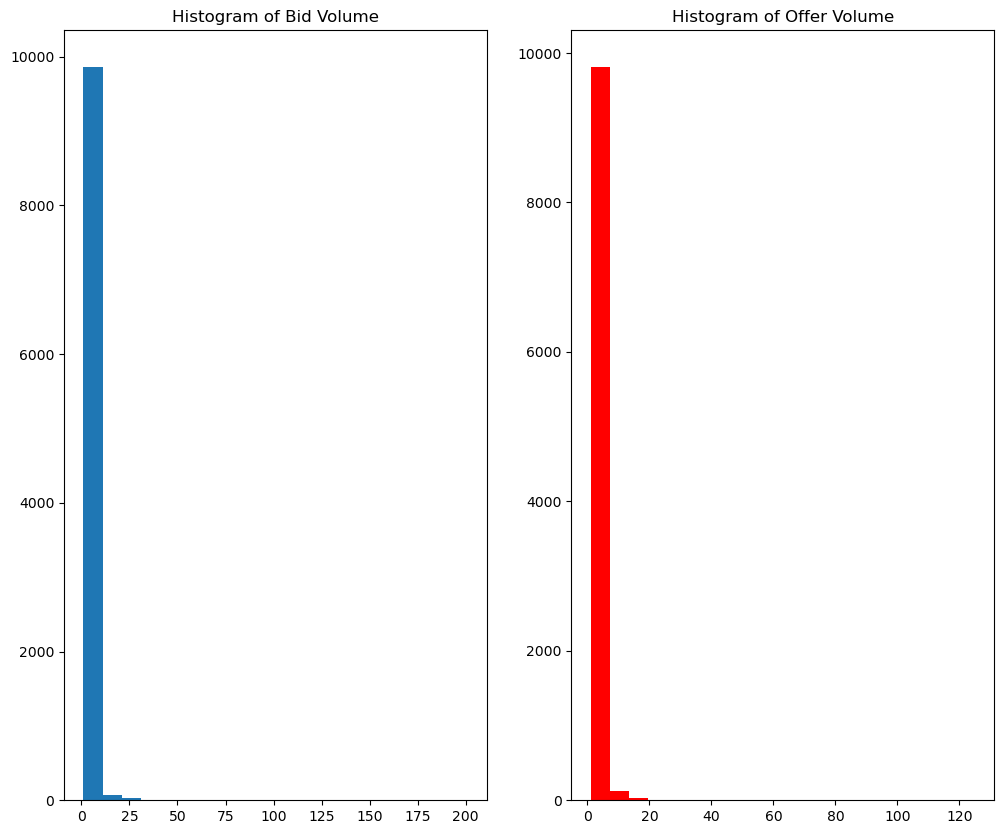

In [247]:
fig,ax=plt.subplots(1,2,figsize=(12,10))

ax[0].hist(simple_quotes['FB0'].values,bins=20)
ax[0].set_title("Histogram of Bid Volume")
ax[1].hist(simple_quotes['FA0'].values,bins=20, color='red')
ax[1].set_title("Histogram of Offer Volume")

### Time Dependent Volume

Text(0.5, 1.0, 'Histogram of Change in Offer Volume')

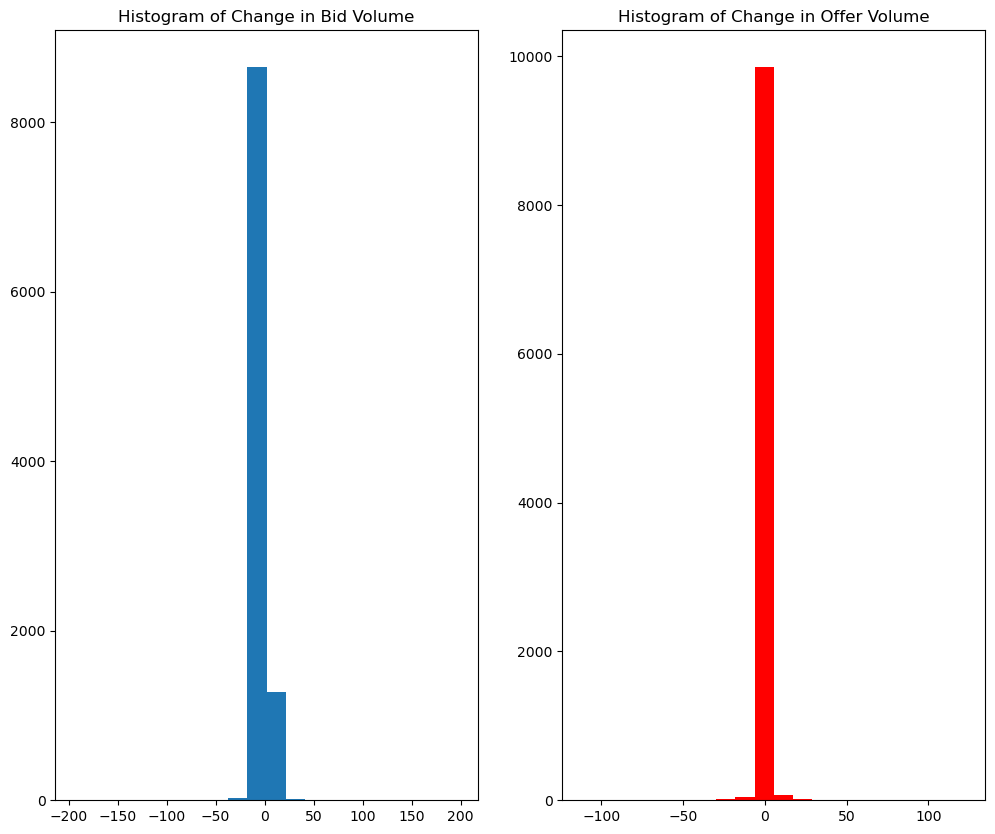

In [248]:
fig,ax=plt.subplots(1,2,figsize=(12,10))

ax[0].hist(simple_quotes['FB2'].values,bins=20)
ax[0].set_title("Histogram of Change in Bid Volume")
ax[1].hist(simple_quotes['FA2'].values,bins=20, color='red')
ax[1].set_title("Histogram of Change in Offer Volume")

### Generate Labels of outcomes 

In paper they used $\triangle =$ 5 , 10, 20, 50 ,100

In [249]:
def gen_interval(quotes,freq):
    start=datetime.strptime( str(str(quotes.index[0].date()) +" 09:30:00") ,"%Y-%m-%d %H:%M:%S")
    end=datetime.strptime( str(str(quotes.index[-1].date()) +" 16:00:00") ,"%Y-%m-%d %H:%M:%S")

    intervals=np.arange(start, end, np.timedelta64(freq ,'s'), dtype='datetime64[s]')
    return intervals

In [250]:
intervals=gen_interval(simple_quotes,60)


Aggregate data by timestamp 

In [251]:
simple_quotes['last_interval']=pd.Series(pd.to_datetime(simple_quotes.index)).apply(lambda x: intervals[intervals<x][-1]).values
simple_quotes['p_time']=simple_quotes.index

agg_fun={'Exchange':'first','Symbol':'first','Best_Bid_Price':'first','FB0':'first','Best_Offer_Price':'first','FA0':'first','FB2':'first' , 'FA2':'first', 'p_time':'first'}

grouped_quotes=simple_quotes.groupby('last_interval').agg(agg_fun)
grouped_quotes
                                                                               

,Exchange,Symbol,Best_Bid_Price,FB0,Best_Offer_Price,FA0,FB2,FA2,p_time
last_interval,,,,,,,,,
2020-01-15 09:30:00,N,AAPL,311.94,1.0,311.96,1.0,1.0,0.0,2020-01-15 09:30:00.953633
2020-01-15 09:31:00,N,AAPL,312.20,1.0,312.28,1.0,0.0,0.0,2020-01-15 09:31:00.528450
2020-01-15 09:32:00,N,AAPL,312.92,2.0,313.00,2.0,1.0,0.0,2020-01-15 09:32:00.000522
2020-01-15 09:33:00,N,AAPL,312.98,2.0,313.00,6.0,1.0,5.0,2020-01-15 09:33:00.000454
2020-01-15 09:34:00,N,AAPL,313.14,2.0,313.17,2.0,1.0,0.0,2020-01-15 09:34:01.081393
2020-01-15 09:35:00,N,AAPL,313.14,2.0,313.18,5.0,1.0,4.0,2020-01-15 09:35:02.413622
2020-01-15 09:36:00,N,AAPL,313.76,2.0,313.81,5.0,0.0,4.0,2020-01-15 09:36:00.034850
2020-01-15 09:37:00,N,AAPL,313.97,2.0,314.01,1.0,1.0,-1.0,2020-01-15 09:37:00.052395
2020-01-15 09:38:00,N,AAPL,313.94,1.0,313.96,1.0,-1.0,-3.0,2020-01-15 09:38:00.313588


### Label outcome and view distribution

In [252]:
def classify_mid(x):
    
    if x['Next_Best_Bid']>x['Best_Offer_Price']:
        return 1
    elif x['Next_Best_Offer']<x['Best_Bid_Price']:
        return -1
    else:
        return 0

grouped_quotes['Next_Best_Bid']=grouped_quotes['Best_Bid_Price'].shift(-1)
grouped_quotes['Next_Best_Offer']=grouped_quotes['Best_Offer_Price'].shift(-1)
grouped_quotes['outcome']=grouped_quotes.apply(lambda x: classify_mid(x),axis=1)
grouped_quotes['outcome'].value_counts()/len(grouped_quotes['outcome'].values)
grouped_quotes

,Exchange,Symbol,Best_Bid_Price,FB0,Best_Offer_Price,FA0,FB2,FA2,p_time,Next_Best_Bid,Next_Best_Offer,outcome
last_interval,,,,,,,,,,,,
2020-01-15 09:30:00,N,AAPL,311.94,1.0,311.96,1.0,1.0,0.0,2020-01-15 09:30:00.953633,312.20,312.28,1
2020-01-15 09:31:00,N,AAPL,312.20,1.0,312.28,1.0,0.0,0.0,2020-01-15 09:31:00.528450,312.92,313.00,1
2020-01-15 09:32:00,N,AAPL,312.92,2.0,313.00,2.0,1.0,0.0,2020-01-15 09:32:00.000522,312.98,313.00,0
2020-01-15 09:33:00,N,AAPL,312.98,2.0,313.00,6.0,1.0,5.0,2020-01-15 09:33:00.000454,313.14,313.17,1
2020-01-15 09:34:00,N,AAPL,313.14,2.0,313.17,2.0,1.0,0.0,2020-01-15 09:34:01.081393,313.14,313.18,0
2020-01-15 09:35:00,N,AAPL,313.14,2.0,313.18,5.0,1.0,4.0,2020-01-15 09:35:02.413622,313.76,313.81,1
2020-01-15 09:36:00,N,AAPL,313.76,2.0,313.81,5.0,0.0,4.0,2020-01-15 09:36:00.034850,313.97,314.01,1
2020-01-15 09:37:00,N,AAPL,313.97,2.0,314.01,1.0,1.0,-1.0,2020-01-15 09:37:00.052395,313.94,313.96,-1
2020-01-15 09:38:00,N,AAPL,313.94,1.0,313.96,1.0,-1.0,-3.0,2020-01-15 09:38:00.313588,313.58,313.63,-1


In [253]:
grouped_quotes['outcome'].value_counts()

 1    17
-1     8
 0     5
Name: outcome, dtype: int64